In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
# read file
filename = os.path.join(os.getcwd(), "US_youtube_trending_data.csv")
df = pd.read_csv(filename)
df.head(10)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...
5,w-aidBdvZo8,I Haven't Been Honest About My Injury.. Here's...,2020-08-11T20:00:04Z,UC5zJwsFtEs9WYe3A76p7xIA,Professor Live,24,2020-08-12T00:00:00Z,Professor injury|professor achilles|professor ...,949491,77487,746,7506,https://i.ytimg.com/vi/w-aidBdvZo8/default.jpg,False,False,Subscribe To My Channel - https://www.youtube....
6,uet14uf9NsE,OUR FIRST FAMILY INTRO!!,2020-08-12T00:17:41Z,UCDSJCBYqL7VQrlXfhr1RtwA,Les Do Makeup,26,2020-08-12T00:00:00Z,[None],470446,47990,440,4558,https://i.ytimg.com/vi/uet14uf9NsE/default.jpg,False,False,Hi babygirls! Thank you so much for watching ...
7,ua4QMFQATco,CGP Grey was WRONG,2020-08-11T17:15:11Z,UC2C_jShtL725hvbm1arSV9w,CGP Grey,27,2020-08-12T00:00:00Z,cgpgrey|education|hello internet,1050143,89190,854,6455,https://i.ytimg.com/vi/ua4QMFQATco/default.jpg,False,False,‣ What Was TEKOI: https://www.youtube.com/watc...
8,SnsPZj91R7E,SURPRISING MY DAD WITH HIS DREAM TRUCK!! | Lou...,2020-08-10T22:26:59Z,UCZDdF_p-L88NWVpzF0vjvMQ,Louie's Life,24,2020-08-12T00:00:00Z,surprising|dad|father|papa|with|dream|car|truc...,1402687,95694,2158,6613,https://i.ytimg.com/vi/SnsPZj91R7E/default.jpg,False,False,"Since I was little, i've had these goals for m..."
9,SsWHMAhshPQ,Ovi x Natanael Cano x Aleman x Big Soto - Veng...,2020-08-11T23:00:10Z,UC648rgJOboZlgcDbW00vTSA,Rancho Humilde,10,2020-08-12T00:00:00Z,Vengo De Nada|Aleman|Ovi|Big Soto|Trap|Ovi Nat...,741028,113983,4373,5618,https://i.ytimg.com/vi/SsWHMAhshPQ/default.jpg,False,False,Vengo De Nada - Ovi x Natanael Cano x Aleman x...


In [19]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268787 entries, 60792 to 222585
Data columns (total 40 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   video_id              268787 non-null  object             
 1   title                 268787 non-null  object             
 2   publishedAt           268787 non-null  datetime64[ns, UTC]
 3   channelId             268787 non-null  object             
 4   channelTitle          268787 non-null  object             
 5   trending_date         0 non-null       datetime64[ns]     
 6   tags                  268787 non-null  object             
 7   view_count            268787 non-null  int64              
 8   likes                 268787 non-null  int64              
 9   dislikes              268787 non-null  int64              
 10  comment_count         268787 non-null  int64              
 11  thumbnail_link        268787 non-null  object   

,view_count,likes,dislikes,comment_count,views,likability,commentability,previous_trend_count,view_growth_rate,like_growth_rate,...,categoryId_19,categoryId_20,categoryId_22,categoryId_23,categoryId_24,categoryId_25,categoryId_26,categoryId_27,categoryId_28,categoryId_29
count,2.687870e+05,2.687870e+05,268787.000000,2.687870e+05,2.687870e+05,2.687300e+05,2.687300e+05,268787.000000,2.687870e+05,2.687870e+05,...,268787.000000,268787.000000,268787.000000,268787.000000,268787.000000,268787.000000,268787.000000,268787.000000,268787.000000,268787.000000
mean,2.734467e+06,1.314697e+05,1134.277495,1.014303e+04,1.555270e+06,inf,inf,2.699710,inf,inf,...,0.006373,0.198082,0.084279,0.049046,0.200657,0.035973,0.026415,0.024759,0.030344,0.000446
std,9.794087e+06,4.539469e+05,8047.291315,7.260853e+04,1.472478e+06,NaN,NaN,2.473313,NaN,NaN,...,0.079577,0.398555,0.277806,0.215965,0.400493,0.186222,0.160366,0.155391,0.171532,0.021125
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-9.980154e-01,-1.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.725410e+05,1.796300e+04,0.000000,1.280000e+03,4.725410e+05,2.565186e-02,1.648807e-03,1.000000,1.456316e-02,8.312485e-03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.368710e+05,4.020500e+04,0.000000,2.754000e+03,9.368710e+05,4.640013e-02,2.971973e-03,2.000000,6.502875e-02,3.792365e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.106178e+06,9.877300e+04,467.000000,6.386000e+03,2.106178e+06,6.898895e-02,5.091827e-03,4.000000,1.521389e-01,9.110738e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.407644e+09,1.602153e+07,879354.000000,6.738537e+06,4.858110e+06,inf,inf,36.000000,inf,inf,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# check missing values
df.isna().sum()


video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          4549
dtype: int64

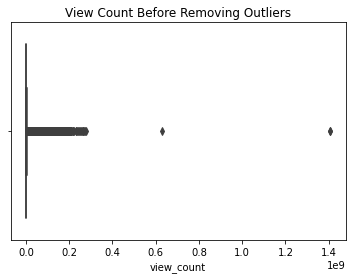

In [5]:
# view count before removing outliers
sns.boxplot(x=df['view_count'])
plt.title('View Count Before Removing Outliers')
plt.show()

In [6]:
# get rid of outliers (using IQR)

Q1 = df['view_count'].quantile(0.25)
Q3 = df['view_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df[(df['view_count'] >= lower_bound) & (df['view_count'] <= upper_bound)]

# can alternatively set a threshold ?
# max_threshold = df['view_count'].quantile(0.9)
# df['views'] = df['view_count'].apply(lambda x: min(x, max_threshold))

# normalize numeric features (views, likes, comments) ?

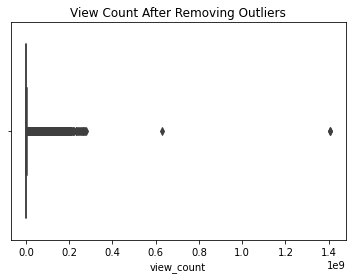

In [7]:
# view count after removing outliers
sns.boxplot(x=df['view_count'])
plt.title('View Count After Removing Outliers')
plt.show()

In [8]:
# create new engagement metrics
df['likability'] = df['likes'] / df['view_count']
df['commentability'] = df['comment_count'] / df['view_count']

In [9]:
df.head(5)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,views,likability,commentability
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,1514614.0,0.103596,0.023315
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",2381688.0,0.061611,0.006948
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,2038853.0,0.173523,0.019727
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,496771.0,0.046804,0.015393
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,1123889.0,0.040753,0.001954


In [10]:
# add a column showing the number of days the video has already been trending
num_prev_days_trending = df['previous_trend_count'] = df.groupby('video_id').cumcount()
num_prev_days_trending

0         0
1         0
2         0
3         0
4         0
         ..
268782    5
268783    9
268784    6
268785    6
268786    8
Length: 268787, dtype: int64

In [11]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'], errors='coerce')

# sort df by video_id and trending_date
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')
df = df.sort_values(by=['video_id', 'trending_date'], ascending=[True, True])

# engagement growth rate over time of videos trending over multiple days
df['view_growth_rate'] = df.groupby('video_id')['view_count'].pct_change().fillna(0)
df['like_growth_rate'] = df.groupby('video_id')['likes'].pct_change().fillna(0)
df['comment_growth_rate'] = df.groupby('video_id')['comment_count'].pct_change().fillna(0)


In [12]:
df.head(100)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,comments_disabled,ratings_disabled,description,views,likability,commentability,previous_trend_count,view_growth_rate,like_growth_rate,comment_growth_rate
60792,--14w5SOEUs,Migos - Avalanche,2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,1076217,122830,...,False,False,Music video by Migos performing Avalanche. Qua...,1076217.0,0.114131,0.008863,0,0.000000,0.000000,0.000000
60991,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,2146104,167034,...,False,False,Watch the the official video for Migos - Avala...,2146104.0,0.077831,0.006057,1,0.994118,0.359880,0.362617
61197,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,3317372,202153,...,False,False,Watch the the official video for Migos - Avala...,3317372.0,0.060938,0.004438,2,0.545765,0.210251,0.132559
61398,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,3963014,218568,...,False,False,Watch the the official video for Migos - Avala...,3963014.0,0.055152,0.003897,3,0.194625,0.081201,0.048978
61605,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,4690242,232455,...,False,False,Watch the the official video for Migos - Avala...,4690242.0,0.049561,0.003357,4,0.183504,0.063536,0.019492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120181,-0Se57MuiL8,Warhammer: The Horus Heresy Cinematic Trailer,2022-03-24 02:57:33+00:00,UCwdh3MTrFq3sXlB4ct8B-Fg,Warhammer,20,NaT,40k|aos|black library|chris peach|citadel mini...,1449292,83924,...,True,False,"Watch massive armies fight, the Warmaster live...",1449292.0,0.057907,0.000000,5,0.039946,0.022092,0.000000
211429,-0YWQULsQcE,LUZU VS FERNANFLOO | LA VELADA DEL AÑO 3,2023-07-01 19:49:54+00:00,UCaY_-ksFSQtTGk0y1HA_3YQ,Ibai,24,NaT,ibai|ibai llanos|reaccionando Ibai|Ibai reacci...,5734915,265404,...,False,False,00:00 Presentación y entradas06:14 Round 110:1...,4858110.0,0.046279,0.001506,0,0.000000,0.000000,0.000000
211660,-0YWQULsQcE,LUZU VS FERNANFLOO | LA VELADA DEL AÑO 3,2023-07-01 19:49:54+00:00,UCaY_-ksFSQtTGk0y1HA_3YQ,Ibai,24,NaT,ibai|ibai llanos|reaccionando Ibai|Ibai reacci...,6513435,289885,...,False,False,00:00 Presentación y entradas06:14 Round 110:1...,4858110.0,0.044506,0.001431,1,0.135751,0.092241,0.079328
211887,-0YWQULsQcE,LUZU VS FERNANFLOO | LA VELADA DEL AÑO 3,2023-07-01 19:49:54+00:00,UCaY_-ksFSQtTGk0y1HA_3YQ,Ibai,24,NaT,ibai|ibai llanos|reaccionando Ibai|Ibai reacci...,6911991,300869,...,False,False,¡Consigue las gafas de Ibai de La Velada y llé...,4858110.0,0.043529,0.001397,2,0.061190,0.037891,0.036052


In [13]:
df['publish_hour'] = df['publishedAt'].dt.hour
df['is_weekend'] = df['publishedAt'].dt.dayofweek > 5

In [14]:
df.head(100)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,description,views,likability,commentability,previous_trend_count,view_growth_rate,like_growth_rate,comment_growth_rate,publish_hour,is_weekend
60792,--14w5SOEUs,Migos - Avalanche,2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,1076217,122830,...,Music video by Migos performing Avalanche. Qua...,1076217.0,0.114131,0.008863,0,0.000000,0.000000,0.000000,16,False
60991,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,2146104,167034,...,Watch the the official video for Migos - Avala...,2146104.0,0.077831,0.006057,1,0.994118,0.359880,0.362617,16,False
61197,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,3317372,202153,...,Watch the the official video for Migos - Avala...,3317372.0,0.060938,0.004438,2,0.545765,0.210251,0.132559,16,False
61398,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,3963014,218568,...,Watch the the official video for Migos - Avala...,3963014.0,0.055152,0.003897,3,0.194625,0.081201,0.048978,16,False
61605,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,4690242,232455,...,Watch the the official video for Migos - Avala...,4690242.0,0.049561,0.003357,4,0.183504,0.063536,0.019492,16,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120181,-0Se57MuiL8,Warhammer: The Horus Heresy Cinematic Trailer,2022-03-24 02:57:33+00:00,UCwdh3MTrFq3sXlB4ct8B-Fg,Warhammer,20,NaT,40k|aos|black library|chris peach|citadel mini...,1449292,83924,...,"Watch massive armies fight, the Warmaster live...",1449292.0,0.057907,0.000000,5,0.039946,0.022092,0.000000,2,False
211429,-0YWQULsQcE,LUZU VS FERNANFLOO | LA VELADA DEL AÑO 3,2023-07-01 19:49:54+00:00,UCaY_-ksFSQtTGk0y1HA_3YQ,Ibai,24,NaT,ibai|ibai llanos|reaccionando Ibai|Ibai reacci...,5734915,265404,...,00:00 Presentación y entradas06:14 Round 110:1...,4858110.0,0.046279,0.001506,0,0.000000,0.000000,0.000000,19,False
211660,-0YWQULsQcE,LUZU VS FERNANFLOO | LA VELADA DEL AÑO 3,2023-07-01 19:49:54+00:00,UCaY_-ksFSQtTGk0y1HA_3YQ,Ibai,24,NaT,ibai|ibai llanos|reaccionando Ibai|Ibai reacci...,6513435,289885,...,00:00 Presentación y entradas06:14 Round 110:1...,4858110.0,0.044506,0.001431,1,0.135751,0.092241,0.079328,19,False
211887,-0YWQULsQcE,LUZU VS FERNANFLOO | LA VELADA DEL AÑO 3,2023-07-01 19:49:54+00:00,UCaY_-ksFSQtTGk0y1HA_3YQ,Ibai,24,NaT,ibai|ibai llanos|reaccionando Ibai|Ibai reacci...,6911991,300869,...,¡Consigue las gafas de Ibai de La Velada y llé...,4858110.0,0.043529,0.001397,2,0.061190,0.037891,0.036052,19,False


In [15]:
df['tag_count'] = df['tags'].apply(lambda x: len(str(x).split('|')))

In [16]:
df.head(50)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,views,likability,commentability,previous_trend_count,view_growth_rate,like_growth_rate,comment_growth_rate,publish_hour,is_weekend,tag_count
60792,--14w5SOEUs,Migos - Avalanche,2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,1076217,122830,...,1076217.0,0.114131,0.008863,0,0.000000,0.000000,0.000000,16,False,8
60991,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,2146104,167034,...,2146104.0,0.077831,0.006057,1,0.994118,0.359880,0.362617,16,False,8
61197,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,3317372,202153,...,3317372.0,0.060938,0.004438,2,0.545765,0.210251,0.132559,16,False,8
61398,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,3963014,218568,...,3963014.0,0.055152,0.003897,3,0.194625,0.081201,0.048978,16,False,8
61605,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,4690242,232455,...,4690242.0,0.049561,0.003357,4,0.183504,0.063536,0.019492,16,False,8
61818,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,5167987,240113,...,4858110.0,0.046462,0.003143,5,0.101859,0.032944,0.031633,16,False,8
62030,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,5726392,247336,...,4858110.0,0.043192,0.002775,6,0.108051,0.030082,-0.021612,16,False,8
62243,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,6078723,252005,...,4858110.0,0.041457,0.002670,7,0.061528,0.018877,0.021271,16,False,8
62481,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,6553613,258885,...,4858110.0,0.039503,0.002487,8,0.078123,0.027301,0.004190,16,False,8
62681,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,6823249,262692,...,4858110.0,0.038500,0.002410,9,0.041143,0.014705,0.009143,16,False,8


In [17]:
# one-hot encode category IDs
df = pd.get_dummies(df, columns=['categoryId'])

In [18]:
df.head(50)

,video_id,title,publishedAt,channelId,channelTitle,trending_date,tags,view_count,likes,dislikes,...,categoryId_19,categoryId_20,categoryId_22,categoryId_23,categoryId_24,categoryId_25,categoryId_26,categoryId_27,categoryId_28,categoryId_29
60792,--14w5SOEUs,Migos - Avalanche,2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,1076217,122830,867,...,0,0,0,0,0,0,0,0,0,0
60991,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,2146104,167034,1755,...,0,0,0,0,0,0,0,0,0,0
61197,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,3317372,202153,2518,...,0,0,0,0,0,0,0,0,0,0
61398,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,3963014,218568,2847,...,0,0,0,0,0,0,0,0,0,0
61605,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,4690242,232455,3145,...,0,0,0,0,0,0,0,0,0,0
61818,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,5167987,240113,3414,...,0,0,0,0,0,0,0,0,0,0
62030,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,5726392,247336,3627,...,0,0,0,0,0,0,0,0,0,0
62243,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,6078723,252005,3778,...,0,0,0,0,0,0,0,0,0,0
62481,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,6553613,258885,3977,...,0,0,0,0,0,0,0,0,0,0
62681,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,NaT,Migos|Avalanche|Quality|Control|Music/Motown|R...,6823249,262692,4107,...,0,0,0,0,0,0,0,0,0,0
